In [2]:
# Import statements
import numpy as np
import pandas as pd

In [4]:
# Import for data visualizations, relevant models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from tensorflow.keras.models import load_model

1. EDA

In [11]:
# Load the dataset
df = pd.read_csv('../dataset/canadian_yield_and_agroclimate.csv')

In [12]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
0,0,barley,46.25,-62.25,1987,59.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
1,1,oats,46.25,-62.25,1987,62.1,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
2,2,spring_wheat,46.25,-62.25,1987,52.2,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
3,3,winter_wheat,46.25,-62.25,1987,52.5,192.0,5.0,7.0,4.0,...,0.0,0.0,7.0,0.0,9.0,23.0,0.0,1.0,0.0,5.0
4,4,barley,46.25,-63.25,1987,59.1,193.0,5.0,8.0,4.0,...,0.0,0.0,7.0,0.0,10.0,23.0,0.0,0.0,0.0,8.0


In [18]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12363 non-null  int64  
 1   CROP         12363 non-null  object 
 2   LATITUDE     12363 non-null  float64
 3   LONGITUDE    12363 non-null  float64
 4   YEAR         12363 non-null  int64  
 5   YIELD        12363 non-null  float64
 6   GSL          12363 non-null  float64
 7   CWD_fall     12363 non-null  float64
 8   CWD_spring   12363 non-null  float64
 9   CWD_summer   12363 non-null  float64
 10  WW_fall      12363 non-null  float64
 11  WW_spring    12363 non-null  float64
 12  WW_summer    12363 non-null  float64
 13  CDD_fall     12363 non-null  float64
 14  CDD_spring   12363 non-null  float64
 15  CDD_summer   12363 non-null  float64
 16  CSDI_fall    12363 non-null  float64
 17  CSDI_spring  12363 non-null  float64
 18  CSDI_summer  12363 non-null  float64
 19  WSDI

In [13]:
# Statistical summary of numeric columns
df.describe()

,Unnamed: 0,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,WW_fall,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
count,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,...,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000,12363.000000
mean,6181.000000,49.808966,-95.359561,1998.579956,167.603850,177.347246,5.246461,5.928658,6.635687,2.805549,...,0.048936,0.934644,2.567014,1.156920,22.288037,32.445118,0.525277,2.499636,2.548896,11.443905
std,3569.035024,3.257184,18.317775,6.875589,323.767494,26.228786,4.815795,3.515251,3.992360,3.134639,...,0.554678,2.700632,4.800225,3.495734,10.390037,15.992216,1.216589,2.378052,2.439814,9.282354
min,0.000000,42.750000,-130.250000,1987.000000,2.000000,47.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3090.500000,46.750000,-108.750000,1993.000000,32.500000,161.000000,3.000000,4.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,19.000000,0.000000,1.000000,0.000000,5.000000
50%,6181.000000,49.750000,-100.250000,1999.000000,45.300000,181.000000,4.000000,5.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,22.000000,29.000000,0.000000,2.000000,2.000000,9.000000
75%,9271.500000,51.250000,-76.250000,2004.000000,68.000000,197.000000,6.000000,7.000000,8.000000,5.000000,...,0.000000,0.000000,6.000000,0.000000,29.000000,45.000000,1.000000,4.000000,4.000000,14.000000
max,12362.000000,57.750000,-60.750000,2010.000000,2110.000000,253.000000,66.000000,37.000000,43.000000,20.000000,...,7.000000,16.000000,32.000000,30.000000,62.000000,87.000000,12.000000,14.000000,12.000000,77.000000


In [20]:
# Summary of categorical data
df.describe(include='object')

,CROP
count,12363
unique,14
top,spring_wheat
freq,1546


In [14]:
# Check missing parts in the dataset (null)
df.isnull().sum()

Unnamed: 0     0
CROP           0
LATITUDE       0
LONGITUDE      0
YEAR           0
YIELD          0
GSL            0
CWD_fall       0
CWD_spring     0
CWD_summer     0
WW_fall        0
WW_spring      0
WW_summer      0
CDD_fall       0
CDD_spring     0
CDD_summer     0
CSDI_fall      0
CSDI_spring    0
CSDI_summer    0
WSDI_fall      0
WSDI_spring    0
WSDI_summer    0
CFD_fall       0
CFD_spring     0
CFD_summer     0
CSU_fall       0
CSU_spring     0
CSU_summer     0
dtype: int64

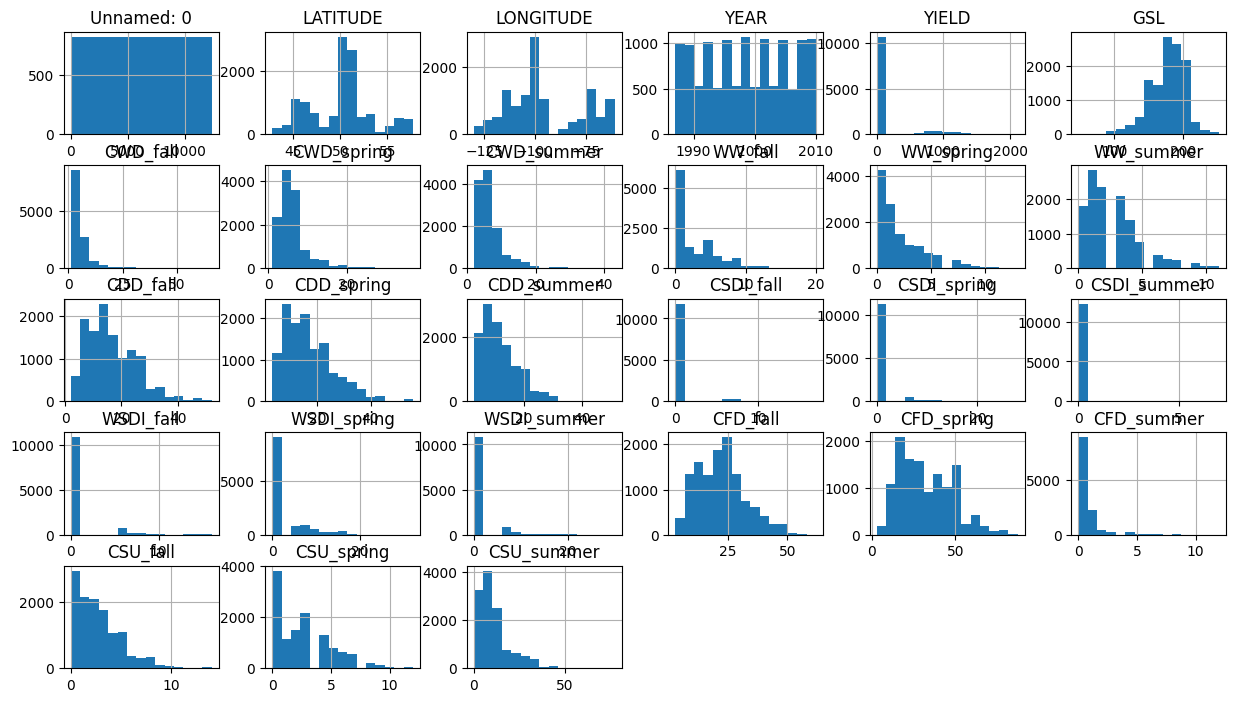

In [16]:
# Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), layout=(6, 6))
plt.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_27184\1038509432.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()  # Adjust subplots to fit into the figure area.


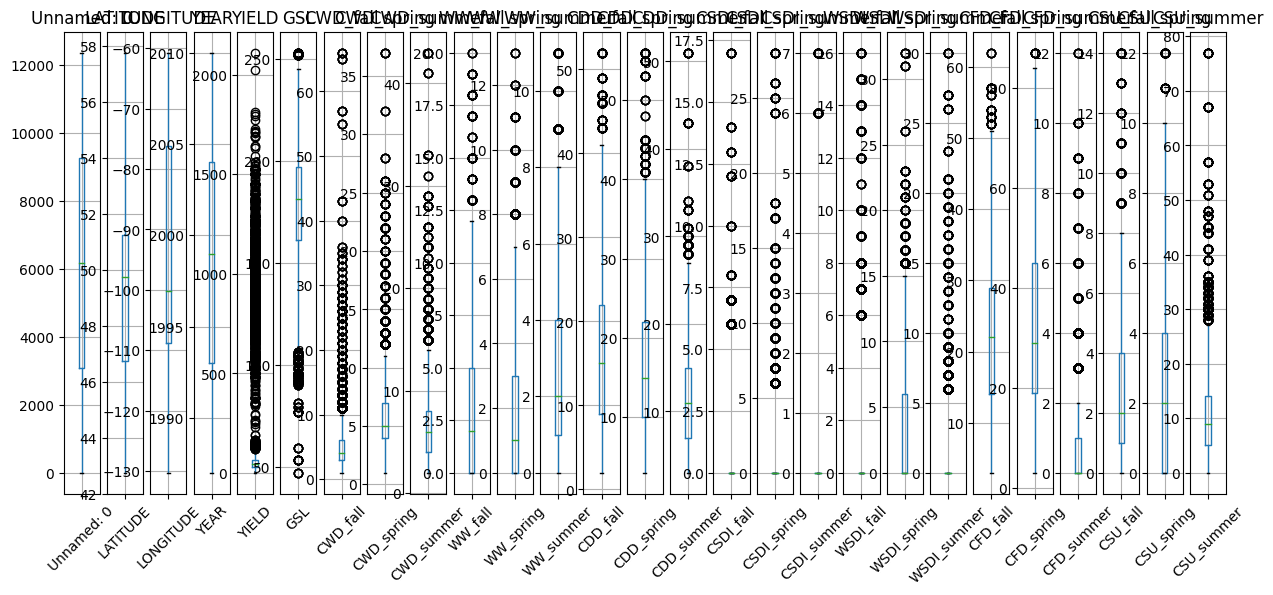

In [22]:
# Box plots for numerical columns to check for outliers
# Select numerical columns
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size and create subplots
plt.figure(figsize=(15, 6))

# Create a boxplot for each numerical column
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    df.boxplot(column=col)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [24]:
# Print crop types
unique_values = df['CROP'].unique()
print(unique_values)

['barley' 'oats' 'spring_wheat' 'winter_wheat' 'corn' 'soybeans' 'canola'
 'fall_rye' 'canary_seed' 'durum_wheat' 'flaxseed' 'lentils' 'mustard'
 'peas']


2. Preprocessing for Input and Output

<p> To make it a classification, I grouped by latitudes and longitudes and deleted rows except where crop yield is max</p>

In [25]:
# Group by then find the row with max 'YIELD' within each group
idx = df.groupby(['LATITUDE', 'LONGITUDE', 'YEAR'])['YIELD'].transform(max) == df['YIELD']
df_max_yield = df[idx]

In [26]:
df_max_yield.columns

Index(['Unnamed: 0', 'CROP', 'LATITUDE', 'LONGITUDE', 'YEAR', 'YIELD', 'GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer'],
      dtype='object')

In [27]:
# Scale numeric values
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_max_yield_ready = df_max_yield.copy()

scaler = StandardScaler()
# all numeric columns except yield
num_cols = ['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']
df_max_yield_ready[num_cols] = scaler.fit_transform(df_max_yield_ready[num_cols])

df_max_yield_ready.head()

,Unnamed: 0,CROP,LATITUDE,LONGITUDE,YEAR,YIELD,GSL,CWD_fall,CWD_spring,CWD_summer,...,CSDI_summer,WSDI_fall,WSDI_spring,WSDI_summer,CFD_fall,CFD_spring,CFD_summer,CSU_fall,CSU_spring,CSU_summer
1,1,oats,-0.863165,1.361161,-1.662666,62.1,0.500227,-0.224612,0.087819,-0.756304,...,-0.087494,-0.334813,1.027176,-0.322338,-1.085531,-0.522680,-0.445982,-0.505793,-0.889116,-0.617150
5,5,oats,-0.863165,1.313777,-1.662666,62.1,0.535917,-0.224612,0.336561,-0.756304,...,-0.087494,-0.334813,1.027176,-0.322338,-0.991780,-0.522680,-0.445982,-0.952482,-0.889116,-0.261607
9,9,oats,-0.722189,1.290085,-1.662666,62.1,0.500227,-0.224612,-0.160923,-0.300696,...,-0.087494,-0.334813,1.027176,-0.322338,-0.804278,-0.522680,-0.445982,-0.505793,-0.889116,-0.498636
13,13,corn,-1.427069,1.219010,-1.662666,84.0,2.141967,-0.224612,0.834045,-0.756304,...,-0.087494,-0.334813,-0.494914,-0.322338,-1.273032,-0.895086,-0.445982,-0.952482,-0.477425,-0.380121
18,18,corn,-1.286093,1.242702,-1.662666,84.0,0.821437,-0.043726,0.834045,-0.756304,...,-0.087494,-0.334813,1.027176,-0.322338,-1.085531,-0.646815,-0.445982,-0.505793,-0.477425,-0.143092


In [29]:
# Set input and output
from sklearn.preprocessing import label_binarize

# Input as X
X = df_max_yield_ready[['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']]

# Output as Y
y = df_max_yield_ready['CROP']

In [32]:
features = df_max_yield_ready[['LATITUDE', 'LONGITUDE', 'YEAR','GSL',
       'CWD_fall', 'CWD_spring', 'CWD_summer', 'WW_fall', 'WW_spring',
       'WW_summer', 'CDD_fall', 'CDD_spring', 'CDD_summer', 'CSDI_fall',
       'CSDI_spring', 'CSDI_summer', 'WSDI_fall', 'WSDI_spring', 'WSDI_summer',
       'CFD_fall', 'CFD_spring', 'CFD_summer', 'CSU_fall', 'CSU_spring',
       'CSU_summer']]

labels = df_max_yield_ready['CROP']
target = df_max_yield_ready['CROP']

In [33]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1257, 25)
Shape of testing feature: (315, 25)
Shape of training label: (1257,)
Shape of training label: (315,)


3. Modeling

In [34]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
prec = []
recall = []
f1 = []
cm = []
model = []

In [35]:
from sklearn import metrics

def eval_model(model_name, y_test, predicted_values):
    # Evaluate using accuracy, precision, recall, and f1 score
    x = metrics.accuracy_score(y_test, predicted_values)
    acc.append(x)
    prec.append(metrics.precision_score(y_test, predicted_values, average='weighted'))
    recall.append(metrics.recall_score(y_test, predicted_values, average='weighted'))
    f1.append(metrics.f1_score(y_test, predicted_values, average='weighted'))
    model.append(model_name)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted_values)

    # Print the report
    print(classification_report(y_test,predicted_values))
    print(cm)

Decision Tree

In [36]:
# Build decision tree model
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)

# Evaluate 
eval_model('Decision Tree', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         5
 canary_seed       0.49      0.80      0.60        44
        corn       0.72      0.95      0.82        87
    fall_rye       1.00      1.00      1.00         2
     lentils       0.76      0.44      0.55        64
     mustard       0.65      0.65      0.65        31
        oats       0.82      0.77      0.80        53
spring_wheat       0.57      0.27      0.36        15
winter_wheat       0.00      0.00      0.00        14

    accuracy                           0.68       315
   macro avg       0.56      0.54      0.53       315
weighted avg       0.66      0.68      0.65       315

[[ 0  0  1  0  0  0  4  0  0]
 [ 0 35  0  0  7  2  0  0  0]
 [ 0  1 83  0  0  0  3  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0 27  0  0 28  9  0  0  0]
 [ 0  9  0  0  2 20  0  0  0]
 [ 1  0  8  0  0  0 41  3  0]
 [ 0  0 10  0  0  0  1  4  0]
 [ 0  0 13  0  0  0  1  0  0]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precisio

In [37]:
# Print result
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.44761905, 0.37777778, 0.70700637, 0.63375796, 0.53821656])

[Text(0.4831730769230769, 0.9166666666666666, 'LONGITUDE <= -0.013\nsamples = 1257\nvalue = [28, 179, 307, 7, 233, 91, 278, 80, 54]\nclass = spring_wheat'),
 Text(0.23076923076923078, 0.75, 'LONGITUDE <= -1.186\nsamples = 674\nvalue = [12, 179, 4, 7, 233, 91, 148, 0, 0]\nclass = corn'),
 Text(0.125, 0.5833333333333334, 'LONGITUDE <= -1.292\nsamples = 187\nvalue = [12, 11, 1, 7, 0, 9, 147, 0, 0]\nclass = canola'),
 Text(0.07692307692307693, 0.4166666666666667, 'YEAR <= -1.156\nsamples = 147\nvalue = [12, 0, 0, 7, 0, 0, 128, 0, 0]\nclass = canola'),
 Text(0.038461538461538464, 0.25, 'CWD_fall <= 0.408\nsamples = 25\nvalue = [0, 0, 0, 6, 0, 0, 19, 0, 0]\nclass = canola'),
 Text(0.019230769230769232, 0.08333333333333333, 'samples = 11\nvalue = [0, 0, 0, 6, 0, 0, 5, 0, 0]\nclass = winter_wheat'),
 Text(0.057692307692307696, 0.08333333333333333, 'samples = 14\nvalue = [0, 0, 0, 0, 0, 0, 14, 0, 0]\nclass = canola'),
 Text(0.11538461538461539, 0.25, 'CSU_spring <= -0.272\nsamples = 122\nvalue 

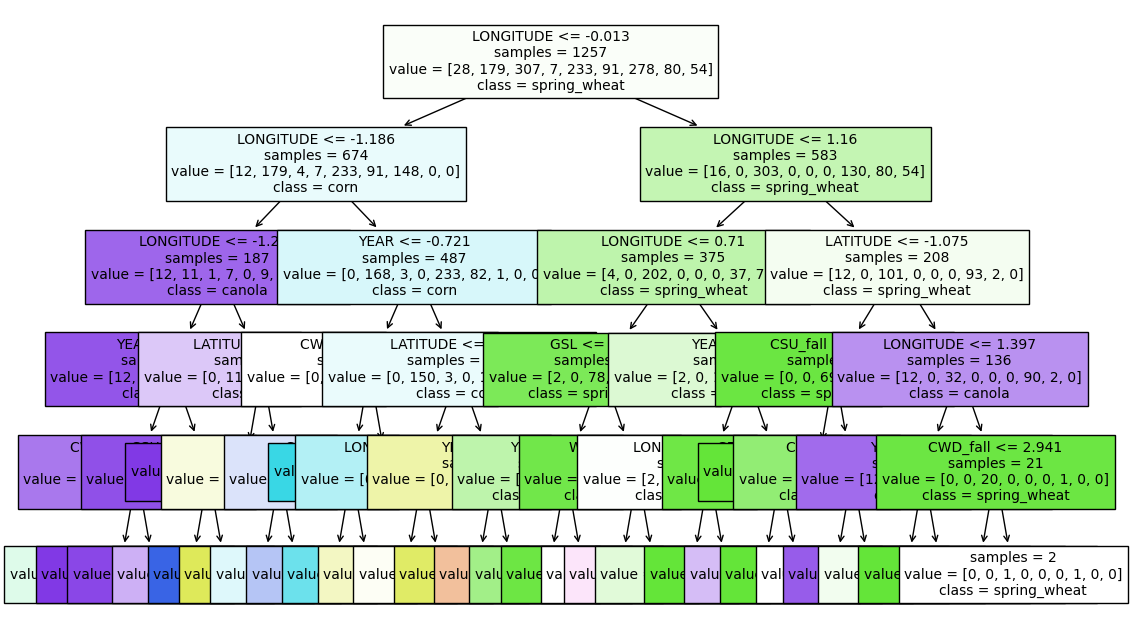

In [39]:
# Call custom_plot_tree to visualize the customized tree
from sklearn import tree
plt.figure(figsize=(12,8))
plot_tree(DecisionTree,
          feature_names=X_train.columns.tolist(),
          class_names=['barley','oats','spring_wheat','winter_wheat','corn','soybeans','canola',
                       'fall_rye','canary_seed','durum_wheat', 'flaxseed', 'lentils', 'mustard',
                       'peas'],
          filled=True,
          impurity=False,
          fontsize=10)

Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

# Evaluate 
eval_model('Random Forest', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.50      0.20      0.29         5
 canary_seed       0.78      0.82      0.80        44
        corn       0.80      0.94      0.87        87
    fall_rye       0.00      0.00      0.00         2
     lentils       0.77      0.84      0.81        64
     mustard       0.87      0.65      0.74        31
        oats       0.76      0.79      0.78        53
spring_wheat       0.57      0.53      0.55        15
winter_wheat       0.33      0.07      0.12        14

    accuracy                           0.77       315
   macro avg       0.60      0.54      0.55       315
weighted avg       0.75      0.77      0.75       315

[[ 1  0  0  0  0  0  4  0  0]
 [ 0 36  0  0  8  0  0  0  0]
 [ 0  0 82  0  0  0  3  1  1]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  7  0  0 54  3  0  0  0]
 [ 0  3  0  0  8 20  0  0  0]
 [ 1  0  9  0  0  0 42  1  0]
 [ 0  0  3  0  0  0  3  8  1]
 [ 0  0  8  0  0  0  1  4  1]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precisio

In [41]:
# Evaluate Model
score = cross_val_score(RF,features,target,cv=5)
score

array([0.53015873, 0.6031746 , 0.59872611, 0.53184713, 0.55414013])

Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

# Evaluate 
eval_model('Naive Bayes', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.04      0.40      0.08         5
 canary_seed       0.55      0.48      0.51        44
        corn       0.75      0.14      0.23        87
    fall_rye       0.12      0.50      0.20         2
     lentils       0.62      0.69      0.65        64
     mustard       0.80      0.26      0.39        31
        oats       0.47      0.15      0.23        53
spring_wheat       0.20      0.07      0.10        15
winter_wheat       0.09      0.64      0.15        14

    accuracy                           0.34       315
   macro avg       0.41      0.37      0.28       315
weighted avg       0.58      0.34      0.36       315

[[ 2  0  0  0  0  0  0  0  3]
 [ 7 21  0  0 15  1  0  0  0]
 [10  0 12  0  0  0  6  3 56]
 [ 0  0  0  1  0  0  1  0  0]
 [ 6 12  0  0 44  1  1  0  0]
 [ 5  5  0  0 12  8  1  0  0]
 [ 9  0  4  7  0  0  8  1 24]
 [ 2  0  0  0  0  0  0  1 12]
 [ 5  0  0  0  0  0  0  0  9]]


In [43]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.14920635, 0.24126984, 0.17834395, 0.27070064, 0.09235669])

KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predicted_values = knn.predict(X_test)

# Evaluate
eval_model('KNN', y_test, predicted_values)

c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      barley       0.33      0.20      0.25         5
 canary_seed       0.71      0.77      0.74        44
        corn       0.70      0.72      0.71        87
    fall_rye       0.00      0.00      0.00         2
     lentils       0.70      0.80      0.74        64
     mustard       0.72      0.58      0.64        31
        oats       0.63      0.60      0.62        53
spring_wheat       0.56      0.67      0.61        15
winter_wheat       0.29      0.14      0.19        14

    accuracy                           0.67       315
   macro avg       0.51      0.50      0.50       315
weighted avg       0.66      0.67      0.66       315

[[ 1  1  3  0  0  0  0  0  0]
 [ 0 34  0  0 10  0  0  0  0]
 [ 1  0 63  0  0  1 15  3  4]
 [ 0  0  0  0  1  1  0  0  0]
 [ 0  9  0  0 51  3  1  0  0]
 [ 0  3  0  0 10 18  0  0  0]
 [ 1  0 16  0  1  0 32  2  1]
 [ 0  0  2  0  0  0  3 10  0]
 [ 0  1  6  0  0  2  0  3  2]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.40634921, 0.3968254 , 0.36942675, 0.36624204, 0.47133758])

Logistic Regression

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

# Evaluate
eval_model('Logistic Regression', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         5
 canary_seed       0.59      0.52      0.55        44
        corn       0.64      0.77      0.70        87
    fall_rye       0.00      0.00      0.00         2
     lentils       0.67      0.77      0.72        64
     mustard       0.79      0.61      0.69        31
        oats       0.53      0.55      0.54        53
spring_wheat       0.42      0.33      0.37        15
winter_wheat       0.43      0.21      0.29        14

    accuracy                           0.62       315
   macro avg       0.45      0.42      0.43       315
weighted avg       0.60      0.62      0.60       315

[[ 0  0  2  0  0  0  3  0  0]
 [ 0 23  0  0 15  1  5  0  0]
 [ 0  0 67  0  0  0 12  4  4]
 [ 0  0  0  0  0  1  1  0  0]
 [ 0 12  0  0 49  3  0  0  0]
 [ 0  3  0  0  9 19  0  0  0]
 [ 0  0 23  0  0  0 29  1  0]
 [ 0  0  6  0  0  0  4  5  0]
 [ 0  1  7  0  0  0  1  2  3]]


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [47]:
score = cross_val_score(LogReg,features,target,cv=5)
score

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

array([0.34603175, 0.47301587, 0.46178344, 0.48089172, 0.49681529])

SVM

In [48]:
from sklearn.svm import SVC

# Build SVC Model
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

# Evaluate
eval_model('SVM', y_test, predicted_values)

              precision    recall  f1-score   support

      barley       0.00      0.00      0.00         5
 canary_seed       0.62      0.59      0.60        44
        corn       0.62      0.83      0.71        87
    fall_rye       0.00      0.00      0.00         2
     lentils       0.68      0.81      0.74        64
     mustard       0.81      0.42      0.55        31
        oats       0.54      0.51      0.52        53
spring_wheat       0.56      0.33      0.42        15
winter_wheat       0.25      0.07      0.11        14

    accuracy                           0.62       315
   macro avg       0.45      0.40      0.41       315
weighted avg       0.60      0.62      0.60       315

[[ 0  1  3  0  0  0  1  0  0]
 [ 0 26  0  0 14  0  4  0  0]
 [ 0  0 72  0  0  0 10  2  3]
 [ 0  0  0  0  0  1  1  0  0]
 [ 0  8  0  0 52  2  2  0  0]
 [ 0  4  0  0 11 13  3  0  0]
 [ 0  0 26  0  0  0 27  0  0]
 [ 0  0  8  0  0  0  2  5  0]
 [ 0  3  8  0  0  0  0  2  1]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precisio

In [49]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.43492063, 0.45396825, 0.50318471, 0.45541401, 0.52866242])

4. Model Comparison

C:\Users\clara\AppData\Local\Temp\ipykernel_27184\692061275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_27184\692061275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = prec,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_27184\692061275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = recall,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_27184\692061275.py:25: FutureWarning: 

Passing `palette` w

<Axes: title={'center': 'F1 Score Comparison'}, xlabel='F1 score', ylabel='Algorithm'>

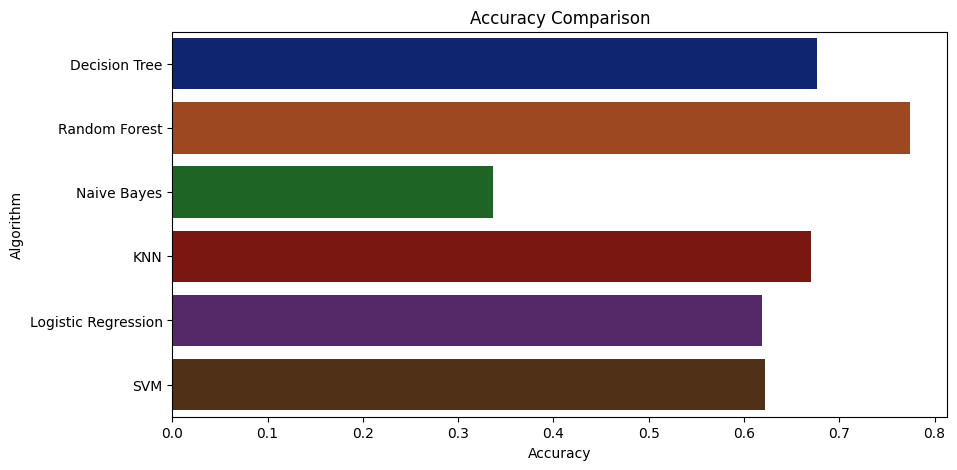

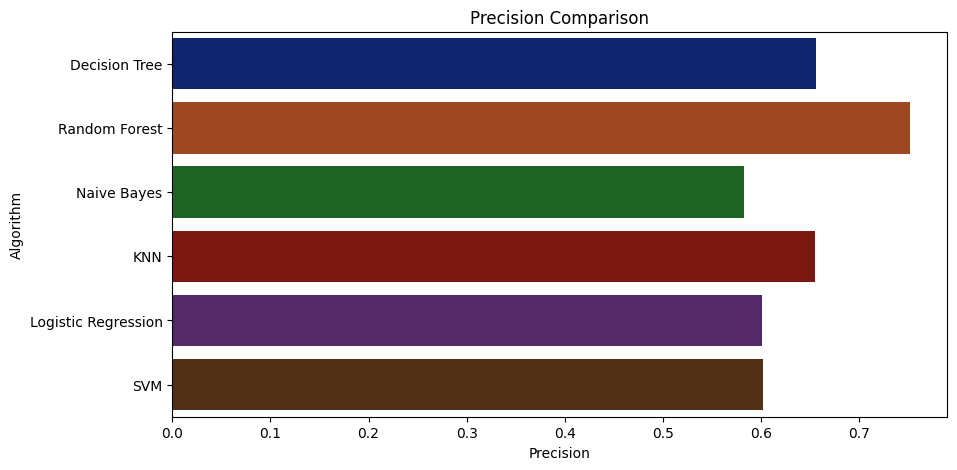

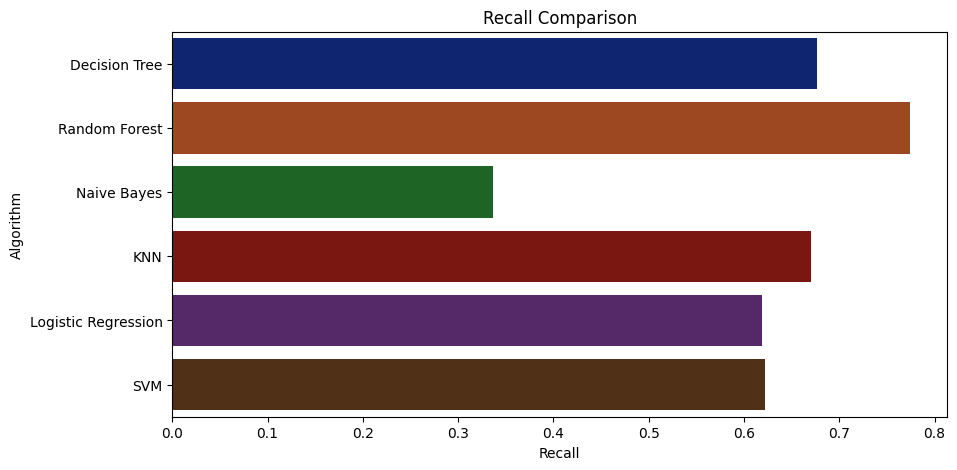

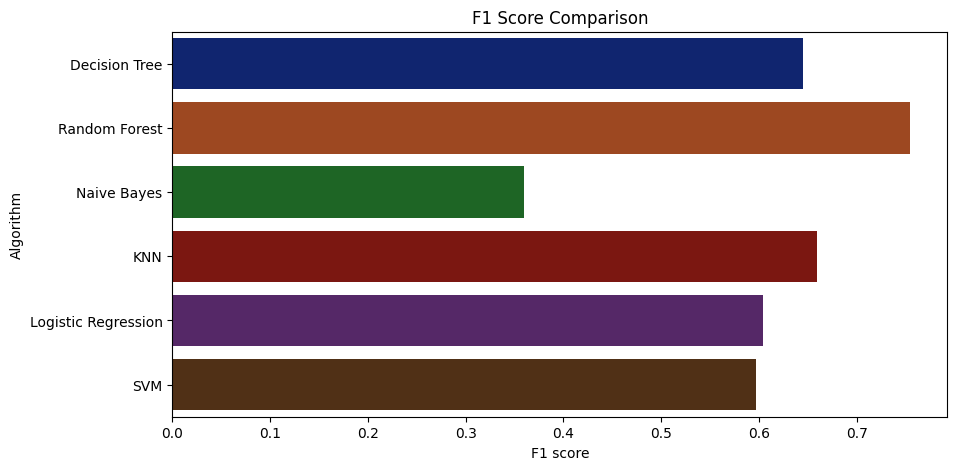

In [50]:
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = prec,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = recall,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('F1 Score Comparison')
plt.xlabel('F1 score')
plt.ylabel('Algorithm')
sns.barplot(x = f1,y = model,palette='dark')

5. Model Optimization

In [51]:
# TBU